![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [6]:
sal['BasePay'].min()

-166.01

In [7]:
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [8]:
print('Avarage: ', sal['OvertimePay'].mean())
print('Min: ', sal['OvertimePay'].min())
print('Max: ', sal['OvertimePay'].max())

Avarage:  5066.059886444622
Min:  -0.01
Max:  245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [28]:
name = 'Joseph Driscoll'
sal[(sal['EmployeeName'] == name) | (sal['EmployeeName'] == name.upper())]['JobTitle']

24       CAPTAIN, FIRE SUPPRESSION
36198    Captain, Fire Suppression
Name: JobTitle, dtype: object

In [18]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
name = 'GARY JIMENEZ'
sal[(sal['EmployeeName'] == name) | (sal['EmployeeName'] == name.upper())]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [30]:
joseph = sal[sal['EmployeeName'] == 'Joseph Driscoll']
print(joseph['Benefits'].values + joseph['TotalPay'].values)

[331834.79]


**What is the name of highest paid person (including benefits)?**

In [41]:
pd.DataFrame([sal.sort_values('TotalPay').loc[0]])['EmployeeName'].values[0]

'NATHANIEL FORD'

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [57]:
sal.sort_values('TotalPay', ascending=True).head(1)['EmployeeName'].values[0]

'Joe Lopez'

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [58]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [69]:
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [76]:
sal['JobTitle'].unique().__len__()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [78]:
sal['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [88]:
sal.groupby('Year')['JobTitle'].unique()

Year
2011    [GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORIT...
2012    [Lieutenant, Fire Suppression, Chief of Police...
2013    [Chief of Police, Chief, Fire Department, Batt...
2014    [Deputy Chief 3, Asst Med Examiner, Chief Inve...
Name: JobTitle, dtype: object

In [92]:
(sal[sal['Year'] == 2013]['JobTitle'].value_counts() == 1).count()

1051

**How many people have the word Chief in their job title?**

In [98]:
sal['JobTitle']

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object

In [103]:
len([name for name in sal['JobTitle'].values if 'Chief' in name])

423

## Data Visualization

**Implement seaborn's countplot with x='Year'**

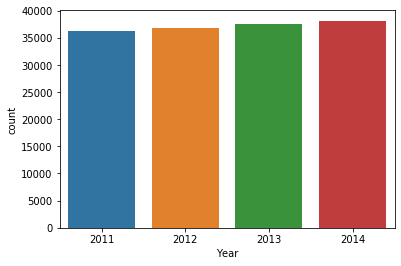

In [104]:
sns.countplot(x='Year', data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

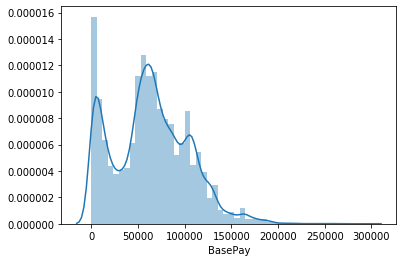

In [105]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'])

**How about other Year**

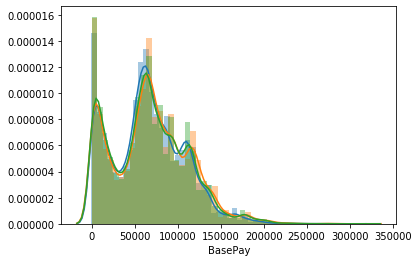

In [112]:
sal['BasePay'] = sal['BasePay'].fillna(0)
sns.distplot(sal[sal['Year'] == 2012]['BasePay'])
sns.distplot(sal[sal['Year'] == 2013]['BasePay'])
sns.distplot(sal[sal['Year'] == 2014]['BasePay'])

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

,BasePay,Benefits,OvertimePay
JobTitle,,,
Police Officer 3,108508.662621,32829.713693,16418.062615
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Registered Nurse,102650.396486,35950.834170,4204.840575
Special Nurse,29929.166718,3210.342240,651.723372
Transit Operator,51772.154465,27355.597533,11143.260866


**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [141]:
sal['JobTitle'].apply(lambda title: len(title)).corr(sal['TotalPay'])

-0.015356226699094552

# Great Job!